**@author : Bienvenu Samuel**

**@group : B**

**@email : samuel.bienvenu@efrei.net**

# Librairies

In [1]:
#installing the necessary librairies 
# pip install pandas numpy matplotlib seaborn

In [2]:
#Importing the necessary librairies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading

In [3]:
df=pd.read_csv('Vizualisation/uber.csv', delimiter=",") #reading the csv file located in the same directory

In [4]:
df.head() #displaying the first 5 rows of the dataset

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
df.describe() #displaying the statistical summary of the dataset

,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


In [6]:
df.info() #displaying the information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


# Data transformation

In [7]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M:%S')

In [8]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [9]:
def get_dom(dt):
    return dt.day #extracting the day of the month from the Date/Time column

In [10]:
df["day"]=df["Date/Time"].map(get_dom) #creating a new column day in the dataset

In [11]:
def get_weekday(dt):
    return dt.weekday() #extracting the day of the week from the Date/Time column

In [12]:
df["weekday"]=df["Date/Time"].map(get_weekday) #creating a new column weekday in the dataset

In [13]:
df

,Date/Time,Lat,Lon,Base,day,weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1
...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2


In [14]:
def get_hour(dt):
    return dt.hour #extracting the hour from the Date/Time column

In [15]:
df["hour"]=df["Date/Time"].map(get_hour) #creating a new column hour in the dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
 4   day        564516 non-null  int64         
 5   weekday    564516 non-null  int64         
 6   hour       564516 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 30.1+ MB


# Visual Representation

In [17]:
#pip install pygwalker

In [18]:
import pygwalker as pyg

In [19]:
uber=pyg.walk(df)
uber
#to turn the pandas dataframe into a interactive UI for visual analysis

Box(children=(HTML(value='\n<div id="ifr-pyg-000621745d6333beUHA1KINYmq2Ecw9C" style="height: auto">\n    <hea…

Text(0.5, 0, 'Days of the month')

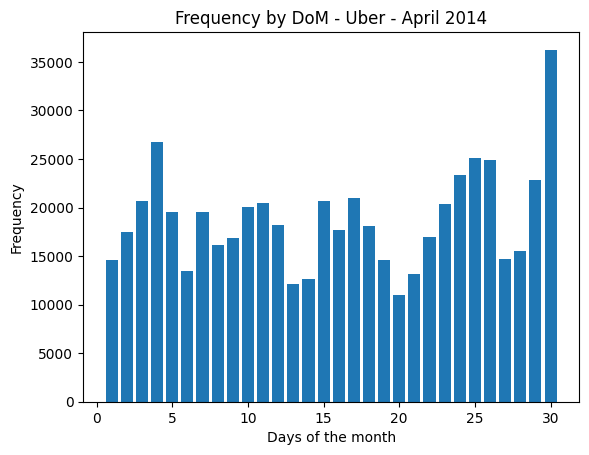

In [20]:
# Créer un histogramme pour connaître la fréquence par jour du mois
 
hist = df["day"].plot.hist(bins = 30, rwidth = 0.8, range=(0.5,30.5), title = "Frequency by DoM - Uber - April 2014")

plt.xlabel('Days of the month')

#binsint or sequence or str, default: rcParams["hist.bins"] (default: 10)
#If bins is an integer, it defines the number of equal-width bins in the range.
#If bins is a sequence, it defines the bin edges, including the left edge of the first bin
#and the right edge of the last bin; in this case, bins may be unequally spaced.

In [21]:
# Création d'une fonction pour regrouper les données par date du mois (dom)
def count_rows(rows):
  return len(rows) 

In [22]:
by_date = df.groupby('day').apply(count_rows)
by_date

/tmp/ipykernel_129909/1814074559.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_date = df.groupby('day').apply(count_rows)


day
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

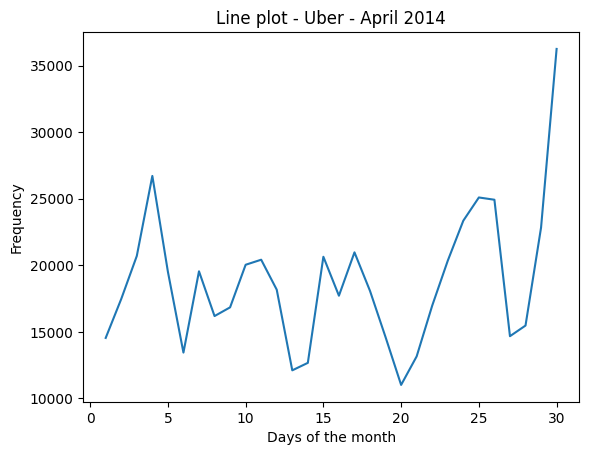

In [23]:
# Plotting the frequency by day of the month
plt.title('Line plot - Uber - April 2014')
plt.xlabel('Days of the month')
plt.ylabel('Frequency')
plt.plot(by_date)

Text(0.5, 1.0, 'Frequency by DoM - Uber - April 2014')

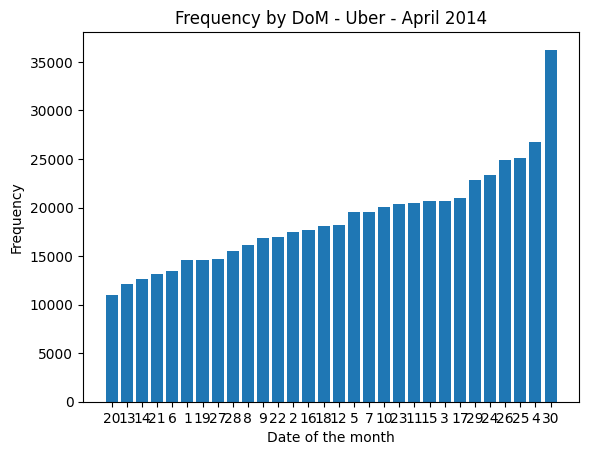

In [24]:
# Utiliser les fonctions plot, bar pour tracer les données par date Trier les données par date et utiliser la fonction bar pour tracer les données triées par date (.sort_values())
plt.bar(range(1, 31), by_date.sort_values())
plt.xticks(range(1, 31), by_date.sort_values().index)
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency by DoM - Uber - April 2014')

Text(0.5, 1.0, 'Frequency by DoM - Uber - April 2014')

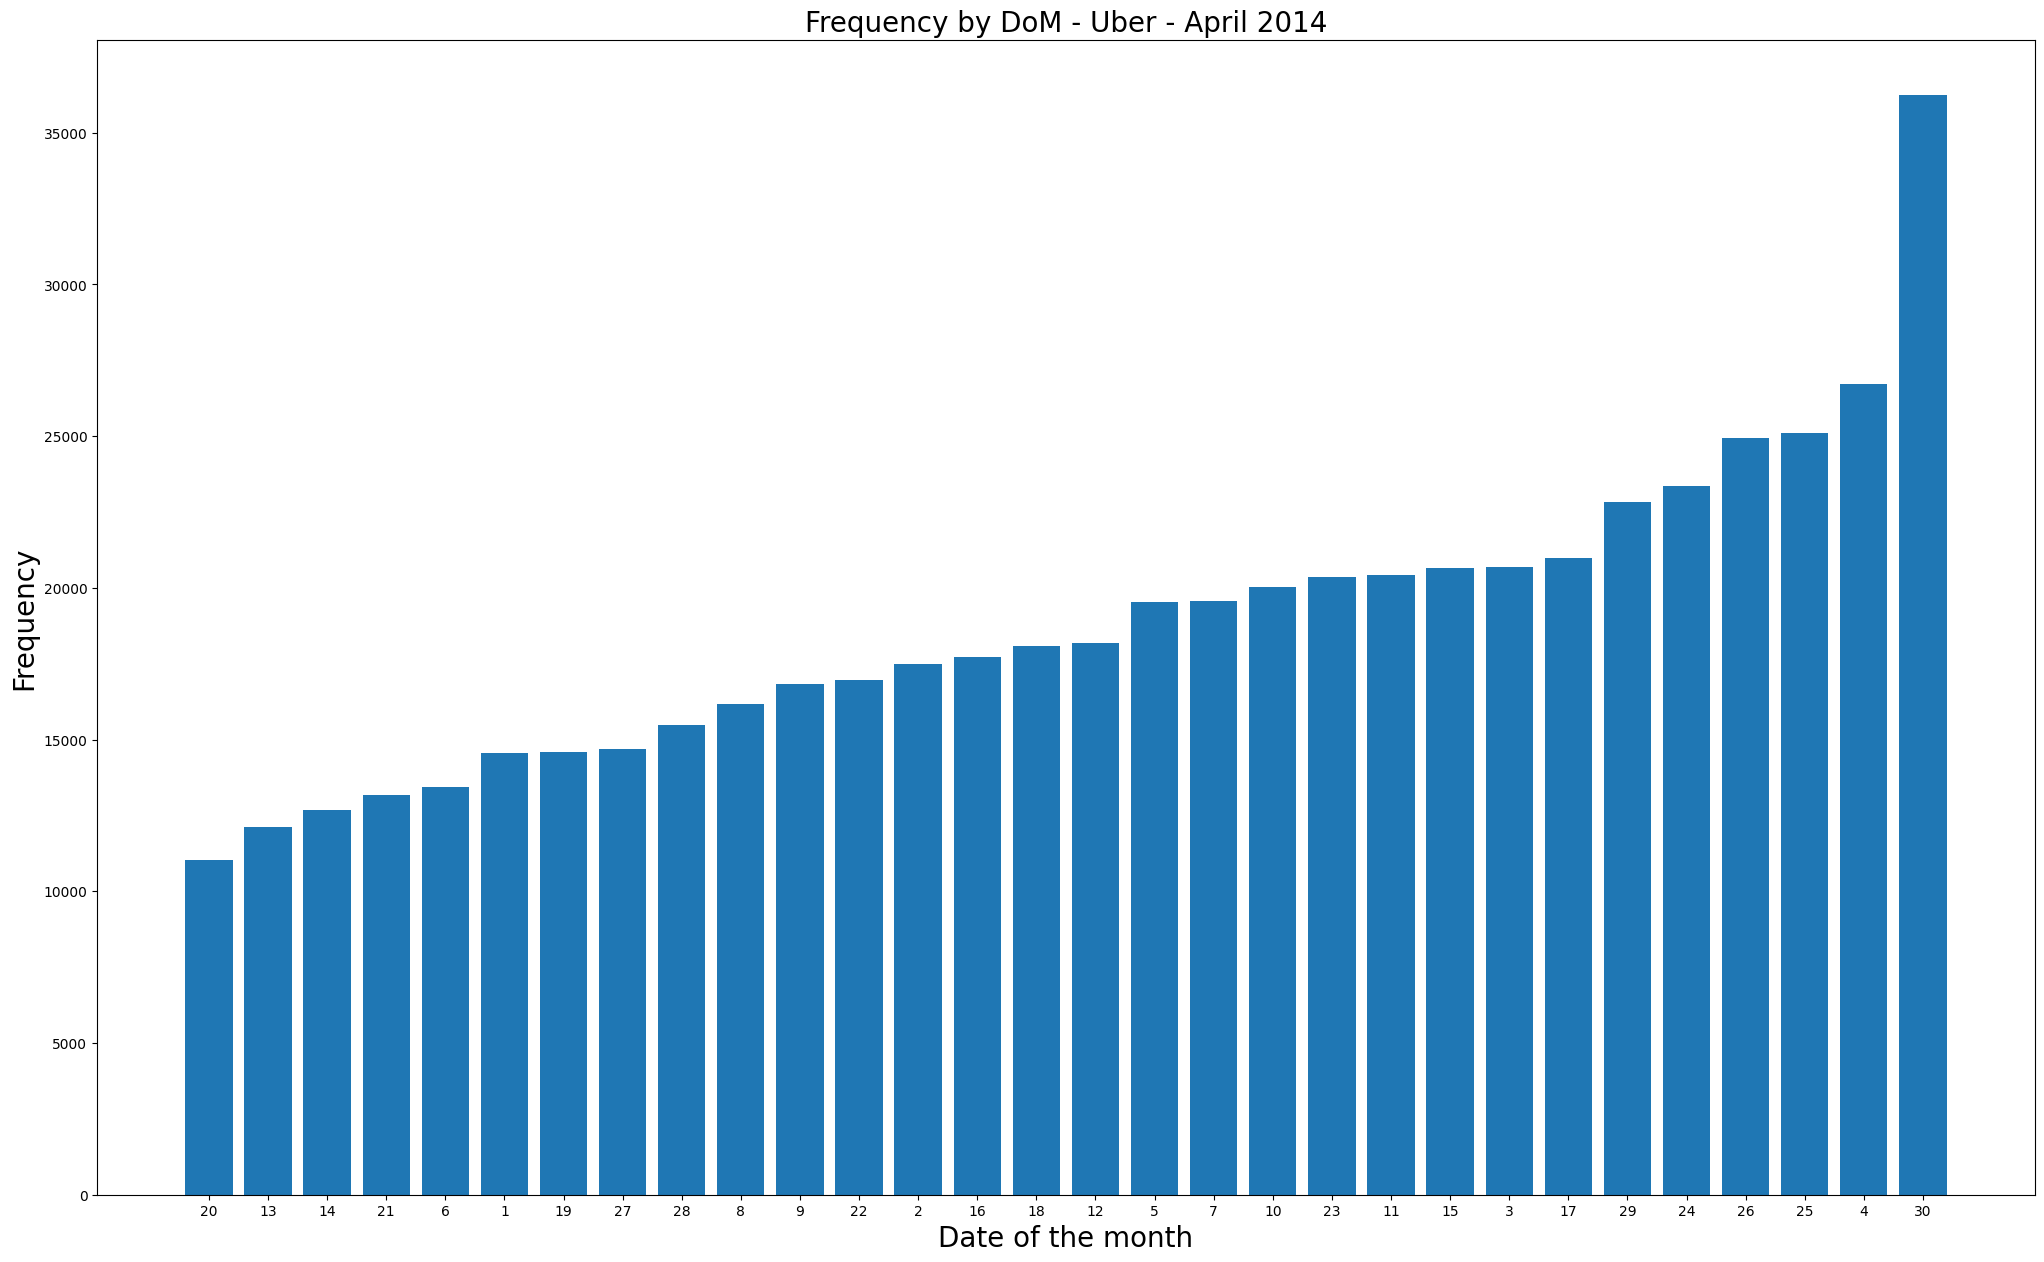

In [25]:
# Plotting the frequency by day of the month - more readable
plt.figure(figsize = (25, 15))
plt.bar(range(1, 31), by_date.sort_values())
plt.xticks(range(1, 31), by_date.sort_values().index)
plt.xlabel(('Date of the month'), fontsize=20)
plt.ylabel(('Frequency'), fontsize=20)
plt.title(('Frequency by DoM - Uber - April 2014'), fontsize=20)

The previous plot represents the frequency of Uber rides by day of the month for the month of April 2014. 

From the plot, we can observe the following:

- The frequency of Uber rides is highest on the 30th day of the month.

Overall, the plot provides insights into the demand for Uber rides throughout the month of April 2014, highlighting the days with the highest and lowest ride frequencies.

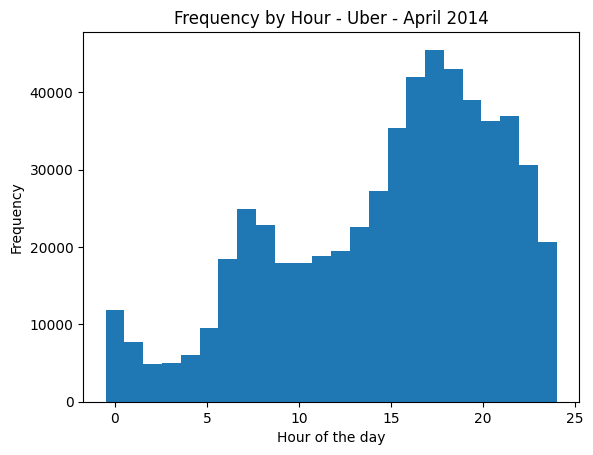

In [26]:
# Plotting the frequency by day of the week
plt.hist(df.hour, bins = 24, range = (-0.5, 24))
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Frequency by Hour - Uber - April 2014');

The plot based on the hours of the day provides insights into the frequency of Uber rides throughout the day for the month of April 2014. 

From the plot, we can observe the following:

- The frequency of Uber rides is relatively low during the early morning hours, from midnight to around 5 AM.
- The frequency starts to increase gradually from around 6 AM and reaches its peak during the morning rush hour, between 7 AM and 9 AM.
- After the morning rush hour, the frequency remains relatively high until around 5 PM, indicating a consistent demand for Uber rides during the daytime.
- From 5 PM onwards, the frequency starts to increase again, reaching another peak during the evening rush hour, between 6 PM and 8 PM.
- After the evening rush hour, the frequency gradually decreases throughout the night, with the lowest frequency observed during the late night hours.

Overall, the plot highlights the patterns of demand for Uber rides based on the hours of the day. It shows the peak hours of demand during the morning and evening rush hours, as well as the relatively lower demand during the late night and early morning hours. This information can be useful for understanding the trends and planning resources accordingly to meet the demand during different times of the day.

([<matplotlib.axis.XTick at 0x703cc40c1610>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

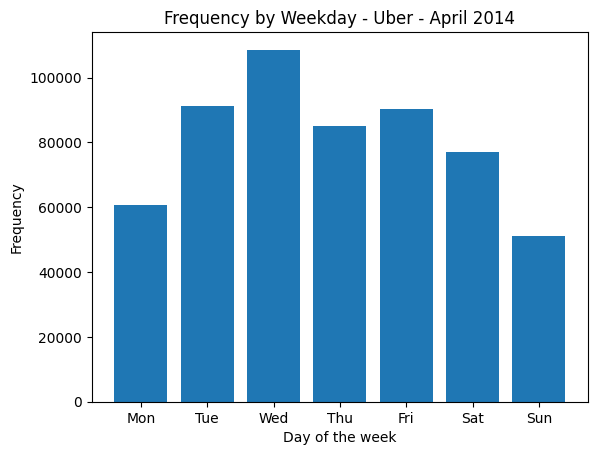

In [27]:
# Plotting the frequency by day of the week
plt.hist(df.weekday, bins = 7,rwidth=0.8, range = (-.5,6.5 ))
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.title('Frequency by Weekday - Uber - April 2014');
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split()) #xtricks to display the days of the week


# Analyse Croisée

In [28]:
#grouped by weekday and hour
df2 = df.groupby(['weekday', 'hour']).apply(count_rows).unstack()
df2.head()

#Pandas Unstack is a function that pivots the level of the indexed columns in a stacked dataframe. 
#A stacked dataframe is usually a result of an aggregated groupby function in pandas.
#Stack() sets the columns to a new level of hierarchy whereas Unstack() pivots the indexed column.

/tmp/ipykernel_129909/191266226.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2 = df.groupby(['weekday', 'hour']).apply(count_rows).unstack()


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393


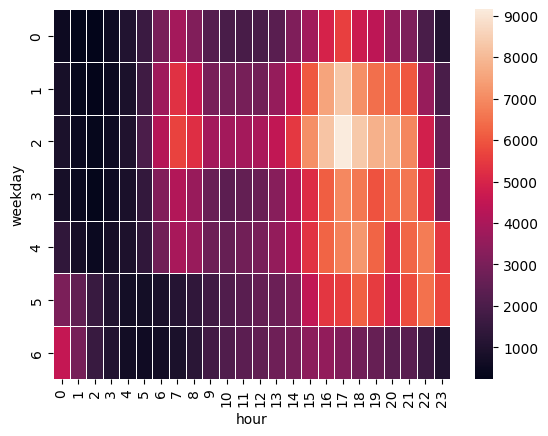

In [29]:
# Hitmap of the grouped data
heatmap=sns.heatmap(df2, linewidths = .5)

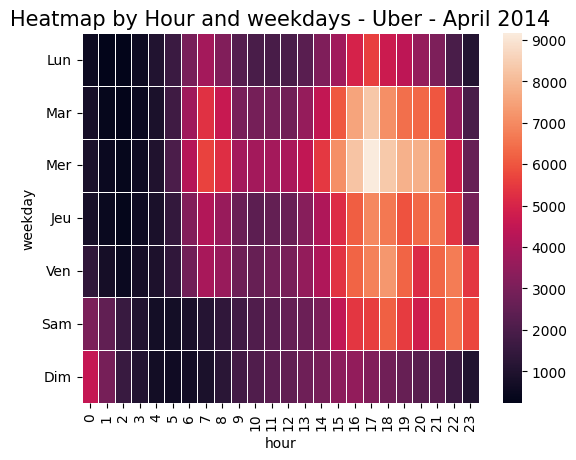

In [30]:
heatmap = sns.heatmap(df2, linewidths = .5);
#Annoted heatmap
plt.title('Heatmap by Hour and weekdays - Uber - April 2014',fontsize=15)
heatmap.set_yticklabels(('Lun Mar Mer Jeu Ven Sam Dim').split(), rotation='horizontal');

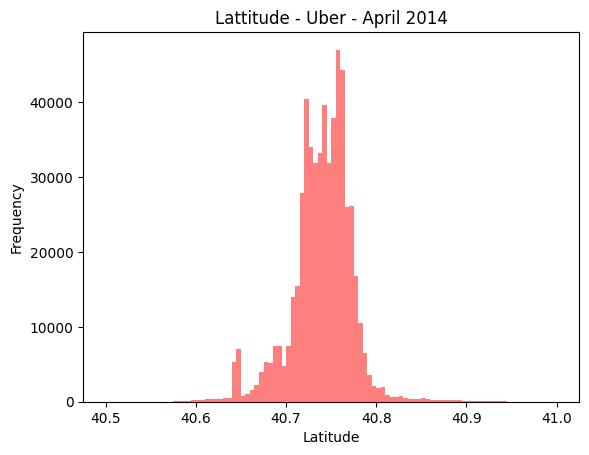

In [31]:
#Lat : 
plt.hist(df['Lat'], bins = 100, range = (40.5, 41), color = 'r',alpha = 0.5, label = 'Latitude') 
plt.xlabel('Latitude') 
plt.ylabel('Frequency') 
plt.title('Lattitude - Uber - April 2014'); 
plt.show()

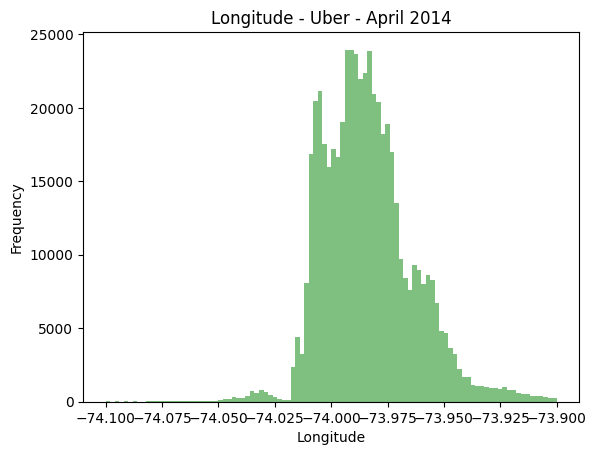

In [32]:
#Lon : 
plt.hist(df['Lon'], bins = 100, range = (-74.1, -73.9), color = 'g', alpha = 0.5, label = 'Longitude') 
plt.xlabel('Longitude') 
plt.ylabel('Frequency') 
plt.title('Longitude - Uber - April 2014'); 
plt.show()

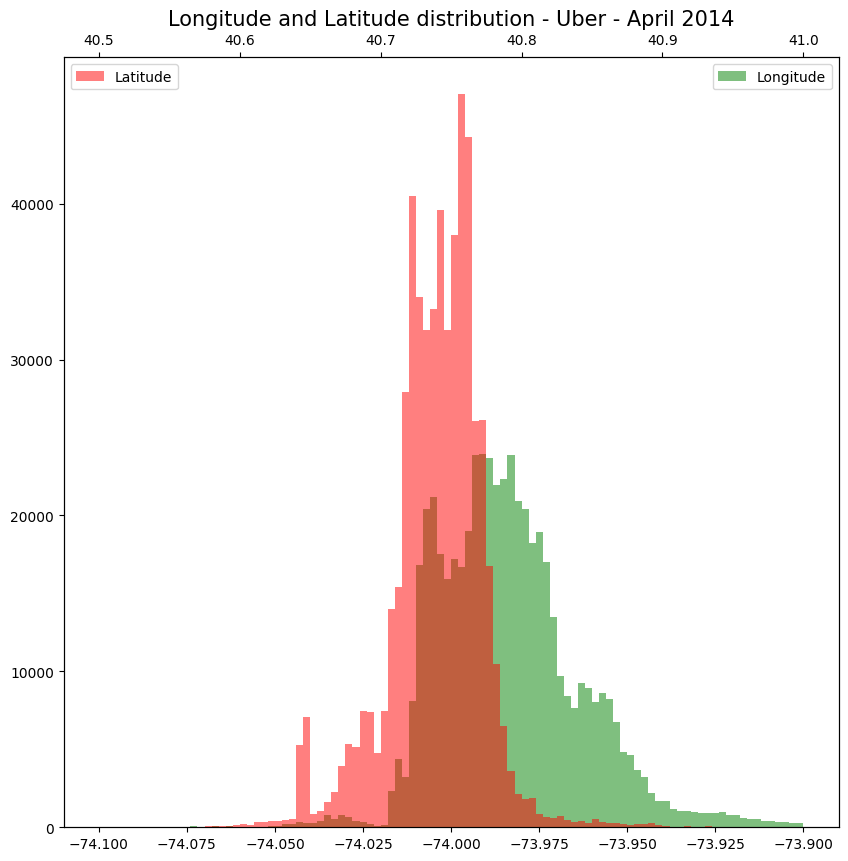

In [33]:
#Let us use twiny() function to overlap the two images with opacity 0.5

plt.figure(figsize=(10, 10), dpi=100) 
plt.title('Longitude and Latitude distribution - Uber - April 2014',fontsize=15) 
plt.hist(df['Lon'], bins = 100, range = (-74.1, -73.9), color = 'g', alpha = 0.5, label = 'Longitude') 
plt.legend(loc = 'best') 
plt.twiny() 
plt.hist(df['Lat'], bins = 100, range = (40.5, 41), color = 'r',alpha = 0.5, label = 'Latitude') 
plt.legend(loc = 'upper left') 
plt.show()

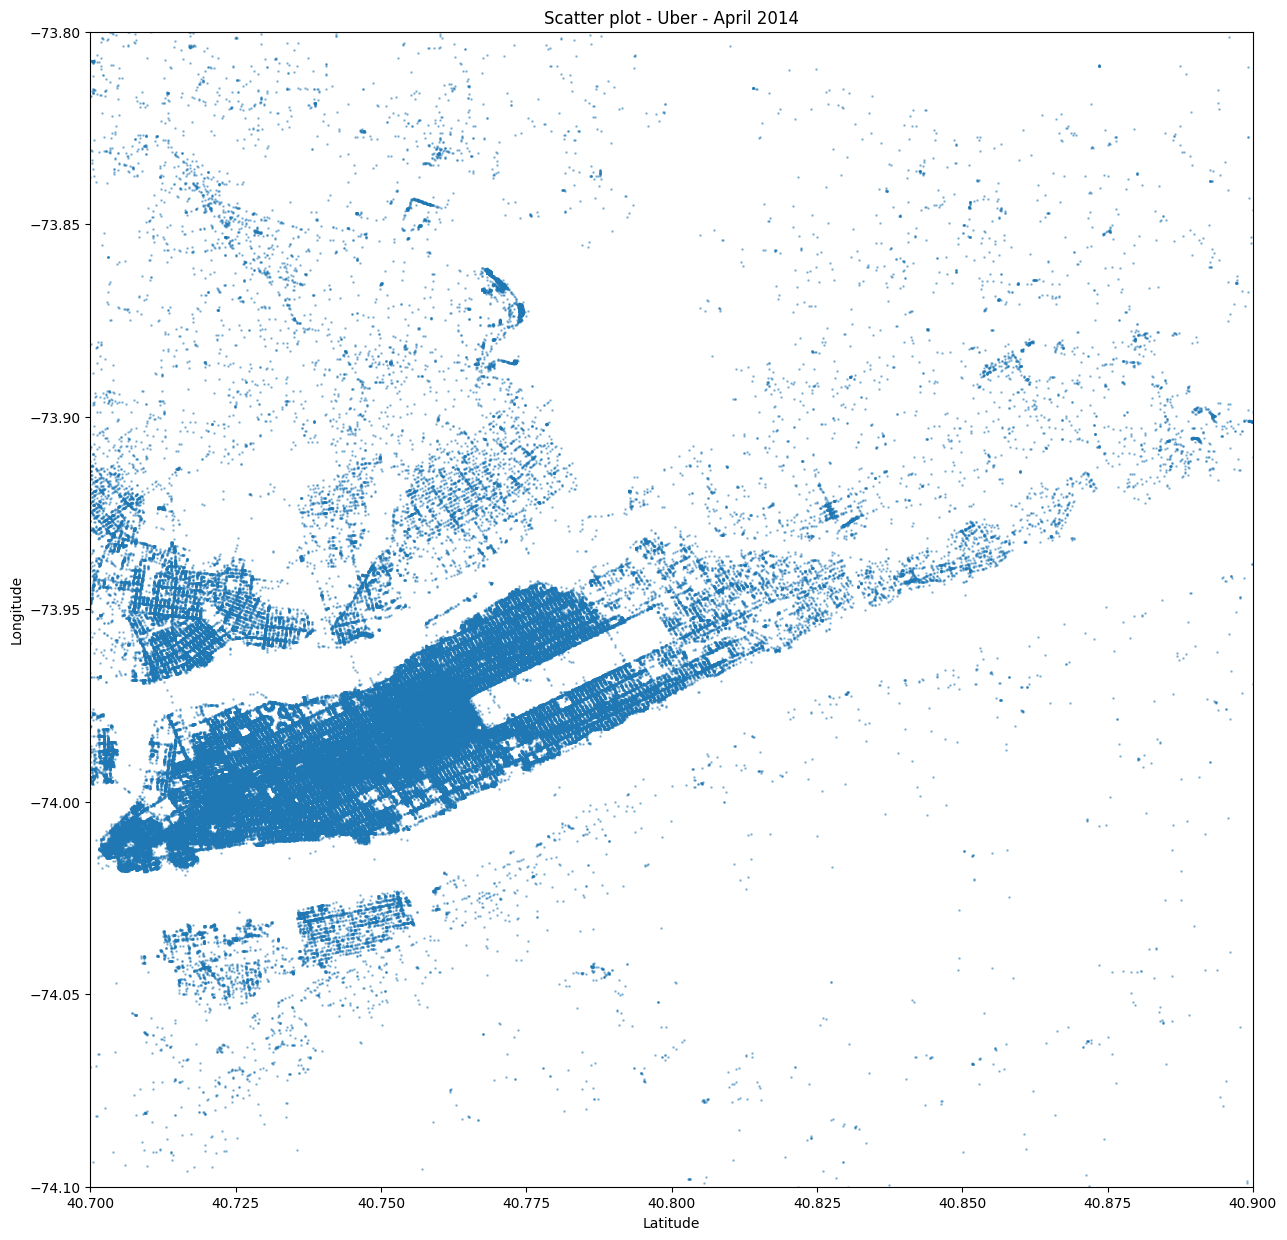

In [34]:
plt.figure(figsize=(15, 15), dpi=100) 
plt.title('Scatter plot - Uber - April 2014') 
plt.xlabel('Latitude') 
plt.ylabel('Longitude') 
plt.scatter(df['Lat'],df['Lon'],s=0.8,alpha=0.4) #Without list also shows the same plot 
plt.ylim(-74.1, -73.8) 
plt.xlim(40.7, 40.9) ;